## 🏠 Part II. King County House Prices — Feature engineering & Model training/evaluation

In [1]:
# Basic package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train/Test split
from sklearn.model_selection import train_test_split

# Normalization/Standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Classfier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC

# Ensemble methods
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1️⃣ Load final dataset (after cleaning part)

In [2]:
df=pd.read_csv(r"C:\Users\SAMSUNG\Desktop\Project2\king_ country_ houses_aa.csv")
house=df.copy()

In [3]:
#data cleaning where the number of bedrooms and bathrooms is 0
house = house[~((house["bedrooms"] <= 0) | (house["bathrooms"] <= 0))]

In [4]:
#changing dtype of date to datetime
house['date']=pd.to_datetime(house['date'])
#adding two new columns 'sale_year' and 'house_age'
house['sale_year']=house['date'].dt.year
house['house_age']=house['sale_year']-house['yr_built']

In [5]:
#data cleaning where where sale_year < yr_built
house=house[~(house["sale_year"] < house["yr_built"])]

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21585 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21585 non-null  int64         
 1   date           21585 non-null  datetime64[ns]
 2   price          21585 non-null  float64       
 3   bedrooms       21585 non-null  int64         
 4   bathrooms      21585 non-null  float64       
 5   sqft_living    21585 non-null  int64         
 6   sqft_lot       21585 non-null  int64         
 7   floors         21585 non-null  float64       
 8   waterfront     21585 non-null  int64         
 9   view           21585 non-null  int64         
 10  condition      21585 non-null  int64         
 11  grade          21585 non-null  int64         
 12  sqft_above     21585 non-null  int64         
 13  sqft_basement  21585 non-null  int64         
 14  yr_built       21585 non-null  int64         
 15  yr_renovated   21585 non

In [7]:
house1=house.drop(['id', 'date', 'yr_built', 'sqft_above'], axis=1)
house1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21585 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21585 non-null  float64
 1   bedrooms       21585 non-null  int64  
 2   bathrooms      21585 non-null  float64
 3   sqft_living    21585 non-null  int64  
 4   sqft_lot       21585 non-null  int64  
 5   floors         21585 non-null  float64
 6   waterfront     21585 non-null  int64  
 7   view           21585 non-null  int64  
 8   condition      21585 non-null  int64  
 9   grade          21585 non-null  int64  
 10  sqft_basement  21585 non-null  int64  
 11  yr_renovated   21585 non-null  int64  
 12  zipcode        21585 non-null  int64  
 13  lat            21585 non-null  float64
 14  long           21585 non-null  float64
 15  sqft_living15  21585 non-null  int64  
 16  sqft_lot15     21585 non-null  int64  
 17  sale_year      21585 non-null  int32  
 18  house_age  

## 2️⃣ Train baseline model

- Linear regression
- KNN Regressor
- Decision Tree
- AdaBoost
- Gradient Boosting
- XGBoost
- Random Forest


##### 1. Linear regression

In [9]:
#Split the dataset
X=house1.drop('price', axis=1)
y=house1['price']

In [10]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

y_test_pred=lm.predict(X_test)
y_train_pred=lm.predict(X_train)

In [11]:
# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 38482958749.64
R-squared Score: 0.71
Train set
Mean Squared Error: 40641798986.57
R-squared Score: 0.70


##### 2. KNN Regressor

In [12]:
#Split the dataset
X=house1.drop('price', axis=1)
y=house1['price']

In [13]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#KNN Regressor
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

y_test_pred=knn.predict(X_test)
y_train_pred=knn.predict(X_train)

In [12]:
# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 73656107528.94
R-squared Score: 0.43
Train set
Mean Squared Error: 45161321529.75
R-squared Score: 0.67


##### 3. XGBoost

In [14]:
#Split the dataset
X=house1.drop('price', axis=1)
y=house1['price']

In [15]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#KNN Regressor
xgbo = xgb.XGBRegressor(random_state=42)
xgbo.fit(X_train, y_train)

y_test_pred=xgbo.predict(X_test)
y_train_pred=xgbo.predict(X_train)

In [16]:
# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 12968106311.88
R-squared Score: 0.90
Train set
Mean Squared Error: 2962095524.61
R-squared Score: 0.98


##### 4. Random Forest

In [17]:
#Split the dataset
X=house1.drop('price', axis=1)
y=house1['price']

In [18]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#RandomForest
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

y_test_pred=rf.predict(X_test)
y_train_pred=rf.predict(X_train)

In [20]:
# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 15214781680.68
R-squared Score: 0.88
Train set
Mean Squared Error: 2401299733.16
R-squared Score: 0.98


##### 5. ADAboost

In [21]:
#Split the dataset
X=house1.drop('price', axis=1)
y=house1['price']

In [22]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create adaboost classifer object
abc = AdaBoostRegressor(random_state=42)
abc.fit(X_train, y_train)

#Predict the response for test dataset
y_test_pred = abc.predict(X_test)
y_train_pred = abc.predict(X_train)


In [23]:
# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 95263673555.37
R-squared Score: 0.28
Train set
Mean Squared Error: 93343224147.62
R-squared Score: 0.31


##### Comparing the models

In [24]:
X=house1.drop('price', axis=1)
y=house1['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
               Model     Train_MSE      Test_MSE  Train_R2   Test_R2
6            XGBoost  2.962096e+09  1.296811e+10  0.978149  0.901710
3      Random Forest  2.401300e+09  1.521478e+10  0.982286  0.884682
5  Gradient Boosting  1.319050e+10  1.671492e+10  0.902697  0.873312
2      Decision Tree  9.108929e+06  3.104438e+10  0.999933  0.764704
0  Linear Regression  4.064180e+10  3.848296e+10  0.700195  0.708325
1      KNN Regressor  4.543097e+10  6.568779e+10  0.664866  0.502130
4           AdaBoost  9.334322e+10  9.526367e+10  0.311429  0.277965


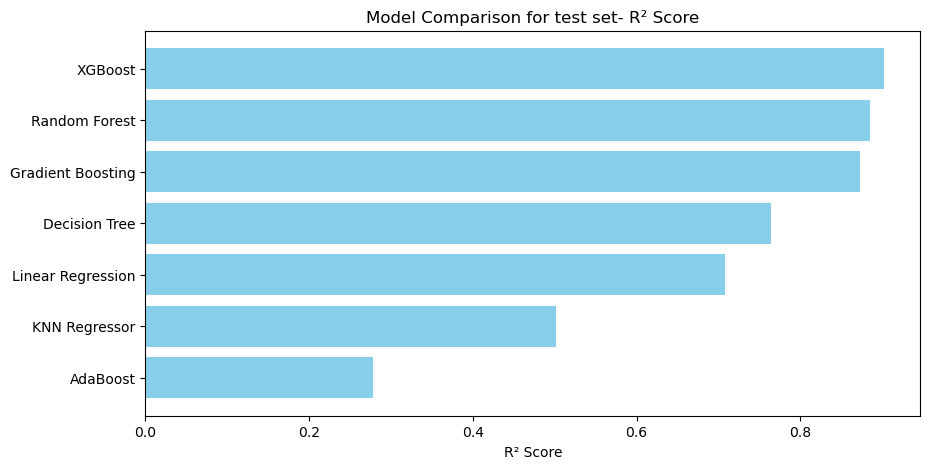

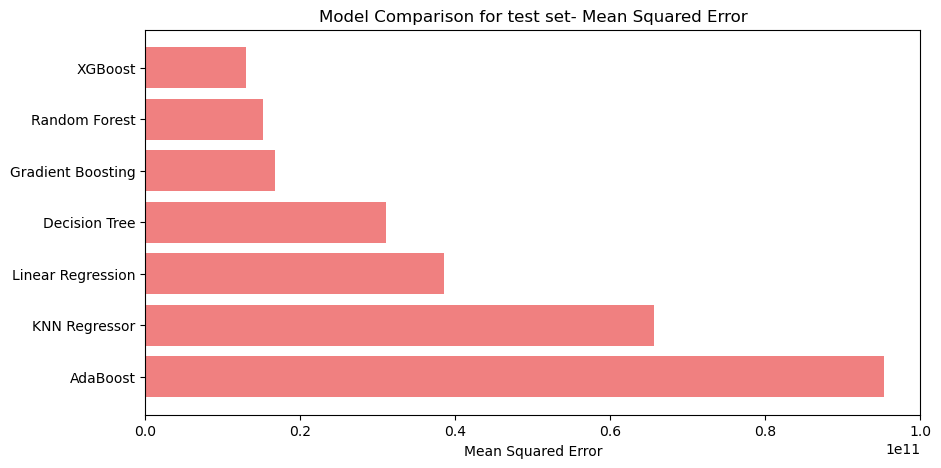

In [25]:
# Visualization

plt.figure(figsize=(10,5))
plt.barh(results_df["Model"], results_df["Test_R2"], color='skyblue')
plt.xlabel("R² Score")
plt.title("Model Comparison for test set- R² Score")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10,5))
plt.barh(results_df["Model"], results_df["Test_MSE"], color='lightcoral')
plt.xlabel("Mean Squared Error")
plt.title("Model Comparison for test set- Mean Squared Error")
plt.gca().invert_yaxis()
plt.show()

## 3️⃣ Feature engineering & Model evaluation

#### 1) Feature engineering - PRICE

- price capping over Q3
- Log-transformation 

#### 2) Scaling - Standardization

#### 3) Hyperparameter Tuning
-RandomizedSearchCV

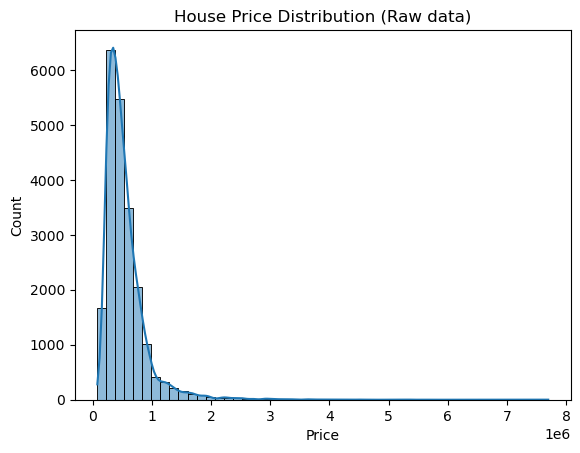

In [8]:
sns.histplot(house1['price'], bins=50, kde=True)
plt.title("House Price Distribution (Raw data)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()
plt.show()

In [27]:
house1['price'].describe()

count    2.158500e+04
mean     5.402444e+05
std      3.672218e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

##### Price capping at Q3

In [9]:
Q3 = house1["price"].quantile(0.75)

In [10]:
house1["price_cap_lower"] = house1["price"].clip(upper=Q3)
house1["price_cap_upper"] = house1["price"].clip(lower=Q3)

In [11]:
house2=house1.copy()

In [12]:
house_cap_upper=house1.drop(['price','price_cap_upper'], axis=1)

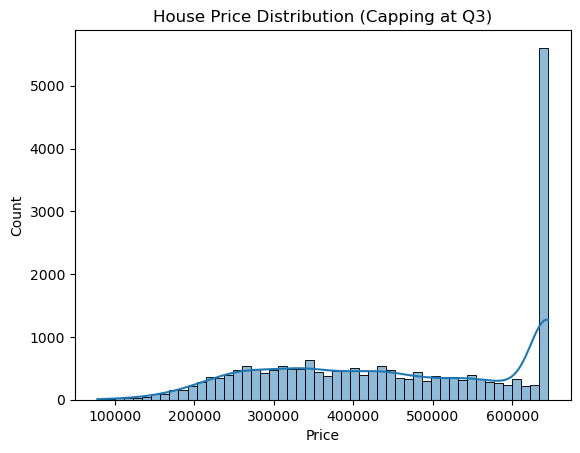

In [13]:
sns.histplot(house_cap_upper['price_cap_lower'], bins=50, kde=True)
plt.title("House Price Distribution (Capping at Q3)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [33]:
X=house_cap_upper.drop('price_cap_lower', axis=1)
y=house_cap_upper['price_cap_lower']

In [34]:
#XGBoost vs RandomForest

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
           Model     Train_MSE      Test_MSE  Train_R2   Test_R2
1        XGBoost  1.104150e+09  2.687456e+09  0.953954  0.888450
0  Random Forest  4.093604e+08  2.928415e+09  0.982928  0.878449


🧮Price capping reduce the model performance (r2score)
 Slight changes in MSE, but more or less same

##### Log transformation on price

In [14]:
house1["price_log"] = np.log1p(house1["price"])

In [15]:
house3=house1.copy()

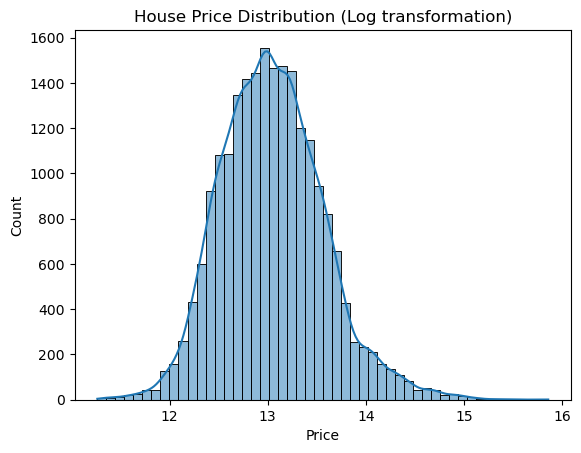

In [17]:
sns.histplot(house1['price_log'], bins=50, kde=True, palette="magma")
plt.title("House Price Distribution (Log transformation)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [37]:
X=house1.drop(['price', 'price_cap_lower', 'price_cap_upper', 'price_log'], axis=1)
y=house1.price_log

In [38]:
#XGBoost vs RandomForest

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
           Model  Train_MSE  Test_MSE  Train_R2   Test_R2
1        XGBoost   0.011641  0.027208  0.957897  0.902834
0  Random Forest   0.004412  0.030085  0.984041  0.892560


🧮 Log_transformation on price has improve the r2 score slightly on test set, and reduce the r2 score for train set, meaning less gap between test and train. MSE is more readable after log transformation.

##### Standardization

In [39]:
#scale from house_cap
from sklearn.preprocessing import StandardScaler

In [41]:
house1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21585 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21585 non-null  float64
 1   bedrooms         21585 non-null  int64  
 2   bathrooms        21585 non-null  float64
 3   sqft_living      21585 non-null  int64  
 4   sqft_lot         21585 non-null  int64  
 5   floors           21585 non-null  float64
 6   waterfront       21585 non-null  int64  
 7   view             21585 non-null  int64  
 8   condition        21585 non-null  int64  
 9   grade            21585 non-null  int64  
 10  sqft_basement    21585 non-null  int64  
 11  yr_renovated     21585 non-null  int64  
 12  zipcode          21585 non-null  int64  
 13  lat              21585 non-null  float64
 14  long             21585 non-null  float64
 15  sqft_living15    21585 non-null  int64  
 16  sqft_lot15       21585 non-null  int64  
 17  sale_year        

In [42]:
num1=house1[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_basement' ]]
cat1=house1[['waterfront', 'view', 'bathrooms', 'bedrooms', 'floors', 'grade', 'condition', 'lat', 'long', 'zipcode', 'sale_year', 'house_age','yr_renovated', 'price_log']]

In [43]:
scaler = StandardScaler()
num_cap = scaler.fit_transform(num1)

In [44]:
num_scale =pd.DataFrame(num_cap, columns=num1.columns, index=house1.index)

In [45]:
house_scale=pd.concat([num_scale, cat1], axis=1)

In [46]:
house_scale

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_basement,waterfront,view,bathrooms,bedrooms,floors,grade,condition,lat,long,zipcode,sale_year,house_age,yr_renovated,price_log
0,-0.980771,-0.228274,-0.943717,-0.260708,-0.658964,0,0,1.00,3,1.0,7,3,47.5112,-122.257,98178,2014,59,0,12.309987
1,0.533542,-0.189841,-0.433002,-0.187799,0.244619,0,0,2.25,3,2.0,7,3,47.7210,-122.319,98125,2014,63,1991,13.195616
2,-1.427438,-0.123258,1.069958,-0.172294,-0.658964,0,0,1.00,2,1.0,6,3,47.7379,-122.233,98028,2015,82,0,12.100718
3,-0.131013,-0.243966,-0.914533,-0.284534,1.396687,0,0,3.00,4,1.0,7,5,47.5208,-122.393,98136,2014,49,0,13.311331
4,-0.436054,-0.169610,-0.272492,-0.192784,-0.658964,0,0,2.00,3,1.0,8,3,47.6168,-122.045,98074,2015,28,0,13.142168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.599469,-0.337370,-0.666472,-0.412500,-0.658964,0,0,2.50,3,3.0,8,3,47.6993,-122.346,98103,2014,5,0,12.793862
21609,0.250289,-0.224339,-0.228716,-0.203891,-0.658964,0,0,2.50,4,2.0,8,3,47.5107,-122.362,98146,2015,1,0,12.899222
21610,-1.155080,-0.332083,-1.410656,-0.394246,-0.658964,0,0,0.75,2,2.0,7,3,47.5944,-122.299,98144,2014,5,0,12.904461
21611,-0.523209,-0.307024,-0.841574,-0.420638,-0.658964,0,0,2.50,3,2.0,8,3,47.5345,-122.069,98027,2015,11,0,12.899222


In [47]:
X=house_scale.drop(['price_log'], axis=1)
y=house_scale.price_log

In [48]:
#XGBoost vs RandomForest

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
           Model  Train_MSE  Test_MSE  Train_R2   Test_R2
1        XGBoost   0.011641  0.027168  0.957897  0.902976
0  Random Forest   0.004404  0.030185  0.984070  0.892203


🧮 Standardization doesn't change any performnce

##### Hyperparameter Tuning

Randomized Search CV

In [49]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

XGBoost

In [50]:
X=house_scale.drop(['price_log'], axis=1)
y=house_scale.price_log

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

param_dist = {
    'n_estimators': np.arange(100, 300, 500),
    'max_depth': np.arange(5, 7, 10),
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.05, 0.1, 0.2],
    'reg_lambda': [0.5, 1, 2],
    'reg_alpha': [0, 0.2, 0.5, 1]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,          # number of random combinations to try
    cv=3,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters found:", random_search.best_params_)
print("Best R² score (CV):", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found: {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': np.int64(100), 'max_depth': np.int64(5), 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best R² score (CV): 0.8966263929876569


In [52]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))

Test MSE: 0.02747364437980646
Test R²: 0.9018844804114321


RandomForest

In [53]:
X=house_scale.drop(['price_log'], axis=1)
y=house_scale.price_log

In [54]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define parameter distribution for sampling
param_dist = {
    'n_estimators': [100, 200, 300, 500],   # number of trees
    'max_depth': [None, 10, 20, 30],        # tree depth
    'min_samples_split': [2, 5, 10],        # min samples to split
    'min_samples_leaf': [1, 2, 4],          # min samples per leaf
    'max_features': ['sqrt', 'log2', None]  # number of features per split
}
#total number of combination=4*4*3*3*3 (432)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                 # number of random hyperparameter combinations to try out of total hyperparameter combination(432)
    cv=3,                      # 3-fold cross-validation (faster than 5)
    scoring='neg_mean_squared_error',
    n_jobs=-1,                 # use all CPU cores
    verbose=2,
    random_state=42
)

# Fit randomized search
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}


In [55]:
# Best model
best_rf = random_search.best_estimator_

# Evaluate on test set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.2f}")

Test MSE: 0.02977877589694106
R-squared Score: 0.89


## 4️⃣ Best-performing model

Best parameter based on randomizedsearchCV

In [56]:
X=house_scale.drop(['price_log'], axis=1)
y=house_scale.price_log

In [57]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#RandomForest
rf = RandomForestRegressor(
    n_estimators= 500, 
    max_features= None, 
    max_depth= None,  
    min_samples_split= 2,
    min_samples_leaf=1,
    random_state=42)

rf.fit(X_train, y_train)

y_test_pred=rf.predict(X_test)
y_train_pred=rf.predict(X_train)

# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 0.03
R-squared Score: 0.89
Train set
Mean Squared Error: 0.00
R-squared Score: 0.98


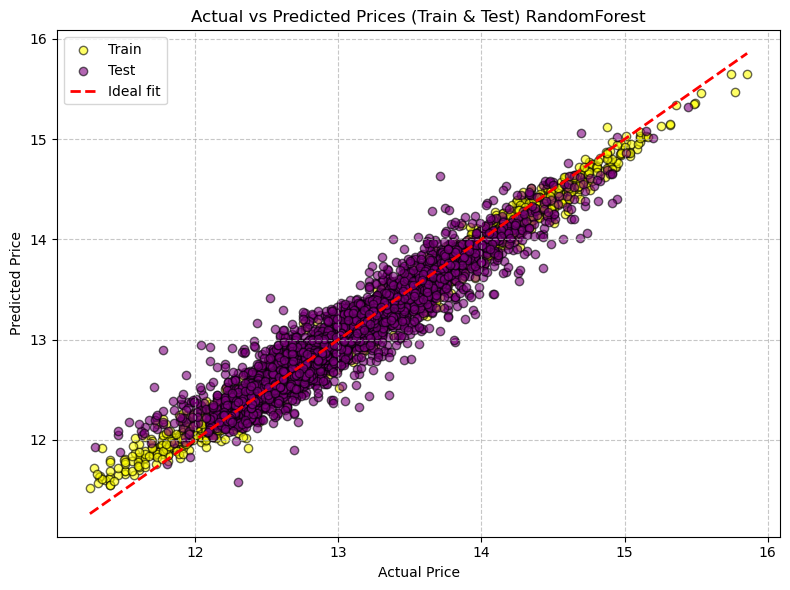

In [58]:
plt.figure(figsize=(8, 6))

# Scatter plots for Train and Test
plt.scatter(y_train, y_train_pred, color='yellow', alpha=0.6, edgecolor='k', label='Train')
plt.scatter(y_test, y_test_pred, color='purple', alpha=0.6, edgecolor='k', label='Test')

# Ideal line (perfect prediction)
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal fit')

# Labels and formatting
plt.title('Actual vs Predicted Prices (Train & Test) RandomForest')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [59]:
X=house_scale.drop(['price_log'], axis=1)
y=house_scale.price_log

In [60]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#KNN Regressor
xgbo = xgb.XGBRegressor(
    subsample = 0.7, 
    reg_lambda = 0.5, 
    reg_alpha = 0.5, 
    n_estimators= 100, 
    max_depth= 5, 
    learning_rate= 0.1, 
    gamma= 0, 
    colsample_bytree= 0.8,
    random_state=42)

xgbo.fit(X_train, y_train)

y_test_pred=xgbo.predict(X_test)
y_train_pred=xgbo.predict(X_train)

# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 0.03
R-squared Score: 0.90
Train set
Mean Squared Error: 0.02
R-squared Score: 0.92


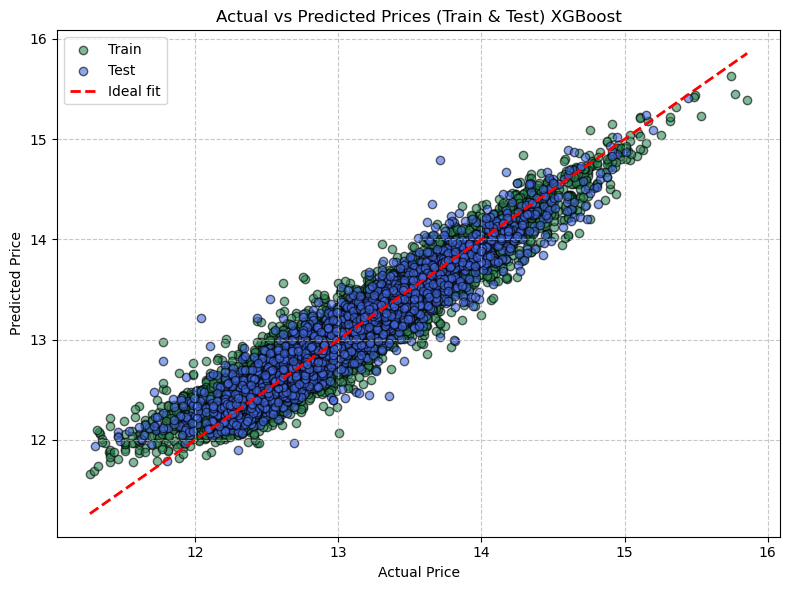

In [61]:
plt.figure(figsize=(8, 6))

# Scatter plots for Train and Test
plt.scatter(y_train, y_train_pred, color='seagreen', alpha=0.6, edgecolor='k', label='Train')
plt.scatter(y_test, y_test_pred, color='royalblue', alpha=0.6, edgecolor='k', label='Test')

# Ideal line (perfect prediction)
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal fit')

# Labels and formatting
plt.title('Actual vs Predicted Prices (Train & Test) XGBoost')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

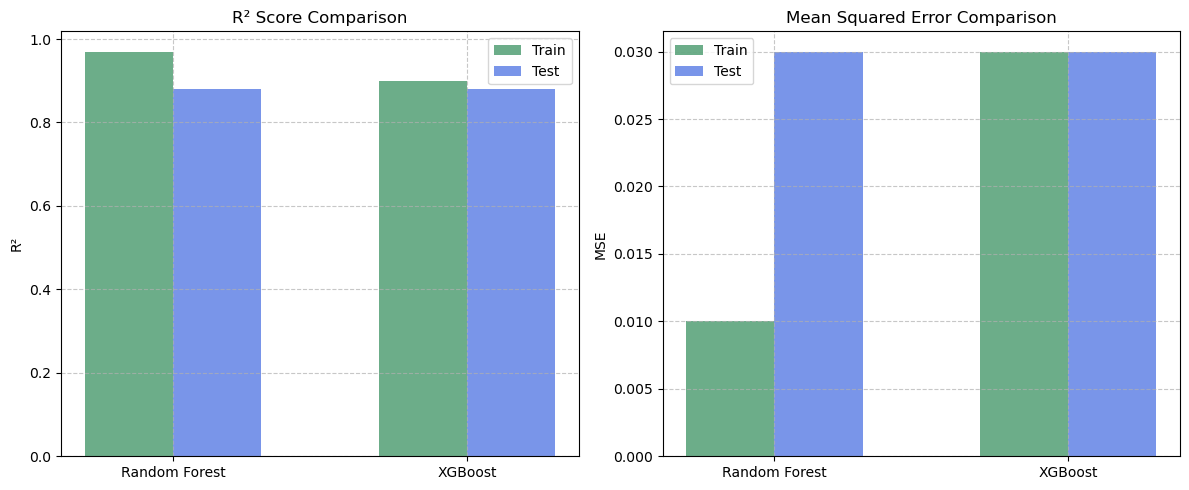

In [62]:
# Performance metrics
models = ['Random Forest', 'XGBoost']

# Values you provided
r2_train = [0.97, 0.90]
r2_test = [0.88, 0.88]
mse_train = [0.01, 0.03]
mse_test = [0.03, 0.03]

x = np.arange(len(models))
width = 0.3  # bar width

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ---- R² comparison ----
ax[0].bar(x - width/2, r2_train, width, label='Train', color='seagreen', alpha=0.7)
ax[0].bar(x + width/2, r2_test, width, label='Test', color='royalblue', alpha=0.7)
ax[0].set_title('R² Score Comparison')
ax[0].set_ylabel('R²')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()
ax[0].grid(True, linestyle='--', alpha=0.7)

# ---- MSE comparison ----
ax[1].bar(x - width/2, mse_train, width, label='Train', color='seagreen', alpha=0.7)
ax[1].bar(x + width/2, mse_test, width, label='Test', color='royalblue', alpha=0.7)
ax[1].set_title('Mean Squared Error Comparison')
ax[1].set_ylabel('MSE')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

🧮 RandomForest vs Xgboost after randomizedsearchCV

R² Comparison:

Random Forest fits the training data more tightly (R² = 0.98 vs 0.92).

XGboost fits the testing data better (R² 0.92 VS 0.89)

→ Random Forest (0.98 for train VS 0.89 for test) shows slightly more overfitting. 

MSE Comparison:

Random Forest has no MSE for training set (0.00 vs 0.03).

Test MSE is identical for both (0.03).
→ XGBoost generalizes slightly better (less overfitting), while Random Forest performs marginally better on training data. 

Overall, XGBoost is more balanced, more stable and generalizes better.